# Week 6 - Exercise 2

Author: Khushee Kapoor

Registration Number: 200968052

Last Updated: 18/9/22

## Setting Up

To set up, we import the following libraries:

- numpy: for data manipulation
- pandas: for data manipulation
- matplotlib: for data visualization
- seaborn: for data visualization
- tensorflow: to build neural networks

In [1]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

Next, we read the training dataset using the read_csv() function from the Pandas library.

In [2]:
# reading the training set
train = pd.read_csv('Google_Stock_Price_Train.csv')

To check if we have read the data correctly, we use the head() funtion from the Pandas library to view the first few rows.

In [3]:
# viewing the first few rows
train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


To check the dimensions of the dataset, we use the shape attribute of the dataframe.

In [4]:
# checking the dimensions
train.shape

(1258, 6)

As we can see, the training set has 1258 rows and 6 columns.

Next, we read the testing dataset using the read_csv() function from the Pandas library.

In [5]:
# reading the testing dataset
test = pd.read_csv('Google_Stock_Price_Test.csv')

To check if we have read the data correctly, we use the head() funtion from the Pandas library to view the first few rows.

In [6]:
# viewing the first few rows
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


To check the dimensions of the dataset, we use the shape attribute of the dataframe.

In [7]:
# checking the dimensions
test.shape

(20, 6)

As we can see, the testing set has 20 rows and 6 columns.

After that, we concatenate the training and testing sets for data preprocessing. This is done because the timesteps mentioned in the question are 50 and the testing set only has 20 instances. We need to reallocate the testing set to have atleast 100 instances so that we can evaluate the models. We use the concat() function from the Pandas library to do this.

In [8]:
# concatenating the training and testing sets
df = pd.concat([train, test])

To check if we have concatenated the data correctly, we use the head() funtion from the Pandas library to view the first few rows.

In [9]:
# viewing the first few rows
df.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


Next, since we need to predict the opening price of the next day, we select only the open column from the dataset.

In [10]:
# selecting only the open column
df = df[['Open']]

As mentioned before, we reallocate the training and testing sets. The training set now has all the data except the last 100 rows which are allocated to the testing set.

In [11]:
# reallocating the training and testing sets
train = df.head(df.shape[0]-100)
test = df.tail(100)

After that, we preprocess the training set by scaling it to values between 0 and 1. We use the MinMaxScaler from the sklearn library for this.

In [12]:
# scaling the training data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)

Next, we divide the training data into x and y - independent and dependent values, however, we do that slightly differently. Here, since the timesteps mentioned are 50, we use the past 50 day's data to predict the values on the 51st day. Similarly, we use the data of days 2 to 51 to predict the values on day 52. We iterate over the training set and change the format of the data by generating sequences. Then we use the array() function from the NumPy library to ensure that the data is in the form of a numpy array.

In [13]:
# changing the format of the data by generating sequences
x_train = []
y_train = []
timesteps = 50

for i in range(timesteps, train.shape[0]):
    x_train.append(train[i-timesteps:i])
    y_train.append(train[i, 0])

# ensuring that the data is in the form of a numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

Now we build a Recurrent Neural Network. We use the Sequential API from the Tensorflow library to add four SimpleRNN layers followed by Dropout layers in to the model. At the end, we add a Dense layer with 1 unit and linear activation for regression.

In [14]:
# building the recurrent neural network
rnn = tf.keras.models.Sequential()

# input and first layer
rnn.add(tf.keras.layers.SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
rnn.add(tf.keras.layers.Dropout(0.2))

# second layer
rnn.add(tf.keras.layers.SimpleRNN(units=40, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

# third layer
rnn.add(tf.keras.layers.SimpleRNN(units=30, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

# fourth layer
rnn.add(tf.keras.layers.SimpleRNN(units=20))
rnn.add(tf.keras.layers.Dropout(0.2))

# output layer
rnn.add(tf.keras.layers.Dense(units=1, activation='linear'))

Next compile the model and set the optimizer to be 'adam', loss to be MeanSquaredError and metric to be RootMeanSquaredError. After that, we train the model on the training data with number of epochs set to 50 and validation split to be 15%. 

In [15]:
# compiling the model
rnn.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.RootMeanSquaredError())

# training the model
rnn.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
30/30 [==============================] - 7s 123ms/step - loss: 0.5626 - root_mean_squared_error: 0.7500 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1594
Epoch 2/50
30/30 [==============================] - 3s 86ms/step - loss: 0.3483 - root_mean_squared_error: 0.5902 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0552
Epoch 3/50
30/30 [==============================] - 3s 84ms/step - loss: 0.2629 - root_mean_squared_error: 0.5127 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
Epoch 4/50
30/30 [==============================] - 2s 81ms/step - loss: 0.2045 - root_mean_squared_error: 0.4522 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448
Epoch 5/50
30/30 [==============================] - 3s 88ms/step - loss: 0.1819 - root_mean_squared_error: 0.4265 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 6/50
30/30 [==============================] - 3s 85ms/step - loss: 0.1552 - root_mean_squared_error: 0.3939 - val_loss: 0.0077 - val_root_

Now we build a Long Short Term Memory model. We use the Sequential API from the Tensorflow library to add four LSTM layers. At the end, we add a Dense layer with 1 unit and linear activation for regression.

In [16]:
# building the lstm
lstm = tf.keras.models.Sequential()

# input and first layer
lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# second layer
lstm.add(tf.keras.layers.LSTM(units=40, return_sequences=True))

# third layer
lstm.add(tf.keras.layers.LSTM(units=30, return_sequences=True))

# fourth layer
lstm.add(tf.keras.layers.LSTM(units=20))

# output layer
lstm.add(tf.keras.layers.Dense(units=1, activation='linear'))

Next compile the model and set the optimizer to be 'adam', loss to be MeanSquaredError and metric to be RootMeanSquaredError. After that, we train the model on the training data with number of epochs set to 50 and validation split to be 15%. 

In [17]:
# compiling the model
lstm.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.RootMeanSquaredError())

# training the model
lstm.fit(x_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
30/30 [==============================] - 11s 140ms/step - loss: 0.0272 - root_mean_squared_error: 0.1648 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 2/50
30/30 [==============================] - 3s 85ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 3/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0552
Epoch 4/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0543
Epoch 5/50
30/30 [==============================] - 3s 85ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 6/50
30/30 [==============================] - 3s 87ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443 - val_loss: 0.0044 - val_root

Next, we scale the testing data by using the previously instantiated scaler.

In [18]:
# scaling the test data
inputs = scaler.transform(test)

Next, we divide the testing data into x and y - independent and dependent values, however, we do that slightly differently. Here, since the timesteps mentioned are 50, we use the past 50 day's data to predict the values on the 51st day. Similarly, we use the data of days 2 to 51 to predict the values on day 52. We iterate over the training set and change the format of the data by generating sequences. Then we use the array() function from the NumPy library to ensure that the data is in the form of a numpy array.

In [19]:
# changing the format of the data by generating sequences
x_test = []
y_test = []

for i in range(timesteps, inputs.shape[0]):
    x_test.append(inputs[i-timesteps:i])
    y_test.append(inputs[i, 0])

# ensuring that the data is in the form of a numpy array
x_test, y_test = np.array(x_test), np.array(y_test)

To evaluate the performance of the models, we use the evaluate() function on the testing set.

In [20]:
# evaluating the rnn
print(str.format('MSE: {:.5f}', rnn.evaluate(x_test, y_test)[0]))

2/2 [==============================] - 0s 13ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999
MSE: 0.00997


In [21]:
# evaluating the lstm
print(str.format('MSE: {:.5f}', lstm.evaluate(x_test, y_test)[0]))

2/2 [==============================] - 0s 19ms/step - loss: 5.9951e-04 - root_mean_squared_error: 0.0245
MSE: 0.00060


As we can see, lstm performs better than the recurrent neural network since the mse is lower.

Next, we obtain the predictions on the test set using the predict() function.

In [22]:
# obtaining the predictions on the test set
rnn_pred = rnn.predict(x_test)
lstm_pred = lstm.predict(x_test)

Before we begin plotting, we inverse scale the data. To do that, we first obtain the scale of the data using the scale_ attribute of the scaler.

In [23]:
# obtaining the scale
scaler.scale_

array([0.00197675])

Next, we invert the scale and multiply it with the predictions and the test set.

In [24]:
# inverting the scale
scale = 1/0.00197675

# inverse scaling the predictions and test set
rnn_pred = rnn_pred*scale
lstm_pred = lstm_pred*scale
y_test = y_test*scale

To plot the predictions and actual data, we use functions from the matplotlib library and assign appropriate labels and colors to the predictions and actual values. We also ensure that a legend is displayed for clarity.

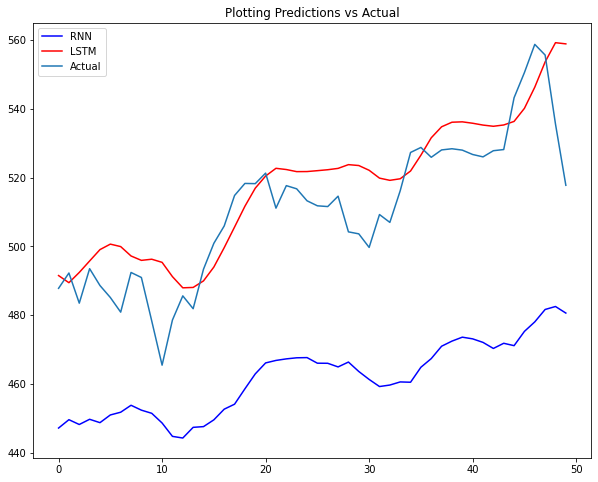

In [25]:
# plotting the predictions and actual data
plt.figure(figsize=(10,8))
plt.plot(rnn_pred, 'b', label='RNN')
plt.plot(lstm_pred, 'r', label='LSTM')
plt.plot(y_test, label='Actual')
plt.title('Plotting Predictions vs Actual')
plt.legend()

As we can see, the lstm prediction is closer to the actual values, albeit a little smoother, whereas the rnn prediction is significantly different.